# Examining Racial Discrimination in the US Job Market

### Background
Racial discrimination continues to be pervasive in cultures throughout the world. Researchers examined the level of racial discrimination in the United States labor market by randomly assigning identical résumés to black-sounding or white-sounding names and observing the impact on requests for interviews from employers.

### Data
In the dataset provided, each row represents a resume. The 'race' column has two values, 'b' and 'w', indicating black-sounding and white-sounding. The column 'call' has two values, 1 and 0, indicating whether the resume received a call from employers or not.

Note that the 'b' and 'w' values in race are assigned randomly to the resumes when presented to the employer.

### Exercises
You will perform a statistical analysis to establish whether race has a significant impact on the rate of callbacks for resumes.

Answer the following questions **in this notebook below and submit to your Github account**. 

   1. What test is appropriate for this problem? Does CLT apply?
   2. What are the null and alternate hypotheses?
   3. Compute margin of error, confidence interval, and p-value. Try using both the bootstrapping and the frequentist statistical approaches.
   4. Write a story describing the statistical significance in the context or the original problem.
   5. Does your analysis mean that race/name is the most important factor in callback success? Why or why not? If not, how would you amend your analysis?

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources
+ Experiment information and data source: http://www.povertyactionlab.org/evaluation/discrimination-job-market-united-states
+ Scipy statistical methods: http://docs.scipy.org/doc/scipy/reference/stats.html 
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
+ Formulas for the Bernoulli distribution: https://en.wikipedia.org/wiki/Bernoulli_distribution

## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

sns.set()

## Functions

In [2]:
def permutation_sample(data1, data2):
    """Return permuted samples of two concatenated datasets."""
    data = np.concatenate((data1, data2))
    permuted_data = np.random.permutation(data)
    sample1 = permuted_data[:len(data1)]
    sample2 = permuted_data[len(data1):]
    return sample1, sample2

def bs_permutation_replicates(data1, data2, func, size = 1):
    """Return an array of bootsrap replicates from permuted samples of two datasets."""
    bs_perm_replicates = np.empty(size)
    for i in range(size):
        perm1, perm2 = permutation_sample(data1, data2)
        bs_replicate = func(perm1, perm2)
        bs_perm_replicates[i] = bs_replicate
    return bs_perm_replicates

def callback_diff(data1, data2):
    """Return differnce between the rates of callback (p1 and p2)."""
    p1 = np.sum(data1) / len(data1)
    p2 = np.sum(data2) / len(data2)
    diff = p2 - p1
    return diff

In [3]:
data = pd.io.stata.read_stata('data/us_job_market_discrimination.dta')

In [4]:
print('Number of callbacks for white-sounding names: %1.0f' %sum(data[data.race=='w'].call))
print('Number of callbacks for black-sounding names: %1.0f' %sum(data[data.race=='b'].call))

Number of callbacks for white-sounding names: 235
Number of callbacks for black-sounding names: 157


In [5]:
data.head()

,id,ad,education,ofjobs,yearsexp,honors,volunteer,military,empholes,occupspecific,...,compreq,orgreq,manuf,transcom,bankreal,trade,busservice,othservice,missind,ownership
0,b,1,4,2,6,0,0,0,1,17,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
1,b,1,3,3,6,0,1,1,0,316,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
2,b,1,4,1,6,0,0,0,0,19,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
3,b,1,3,4,6,0,1,0,1,313,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
4,b,1,3,3,22,0,0,0,0,313,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Nonprofit


In [6]:
n = len(data.index)
counts_by_race = data[['id','race']].groupby('race').count().values
n_b = counts_by_race[0]
n_w = counts_by_race[1]
print('Number of Names: %d' % n)
print('Number of Black Sounding Names: %d' %n_b)
print('Number of White Sounding Names: %d' %n_w)

Number of Names: 4870
Number of Black Sounding Names: 2435
Number of White Sounding Names: 2435


<div class="span5 alert alert-success">
<p>Your answers to Q1 and Q2 here:</p>
    <ul>
        <li> <b>Question 1:</b> 
              
According to the analysis in the cell above, the data set contains 4,870 names split equally among both white sounding names and black sounding names. 4,870 is well above 30, which acts as the general rule of thumb for the minimum population size needed for the central limit theorem to apply. 

In order to determine if the race of an applicant has a significant outcome impact on the rate of callback for interviews, we can perform a two sample bootsrap hypothesis test on the rate of callback for the white sounding and black sounding names.
         </li>
         <li> <b>Question 2:</b>
    
The null hypothesis <i>H</i><sub>0</sub> : The race of an applicant has no impact on the rate of call back for interviews. 

The alternative hypothesis <i>H</i><sub>0</sub> : The race of an applicant does have an impact on the rate of callback for interviews.

If we wanted to express <i>H</i><sub>0</sub> and <i>H</i><sub>1</sub> mathematically, it can be done so as follows. First, we define two proportions <i>p</i><sub>1</sub> and <i>p</i><sub>2</sub> as follows: <i>p</i><sub>1</sub> = rate of callback for black sounding names and <i>p</i><sub>2</sub> = rate of callback for white sounding names. Then:
            <center>
                    <i>H</i><sub>0</sub>: <i>p</i><sub>1</sub> = <i>p</i><sub>2</sub>, and: 
                    <i>H</i><sub>1</sub>: <i>p</i><sub>1</sub> &ne; <i>p</i><sub>2</sub>
            </center> 
          </li>
    </ul>
</div>

In [7]:
w = data['call'][data.race=='w'].values
b = data['call'][data.race=='b'].values

Mean value of p2 - p1: -0.000017
Margin of error for mean value of p2 - p1: +/- 0.000048
95% Confidence interval for p2 - p1: -0.015606 - 0.014784
p-value: 0.000000


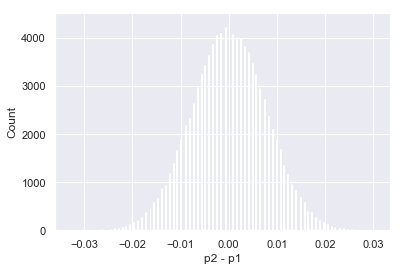

In [8]:
# Your solution to Q3 here
# All function definitions exist at top of notebook.
empirical_diff = callback_diff(b, w)
p2_p1_diffs = bs_permutation_replicates(b, w, callback_diff, size = 100000)
mean_diff = np.mean(p2_p1_diffs)
moe = 1.96 * np.std(p2_p1_diffs) / np.sqrt(len(p2_p1_diffs))
CI1, CI2 = np.percentile(p2_p1_diffs, [2.5, 97.5])
p_value = np.sum(p2_p1_diffs >= empirical_diff) / len(p2_p1_diffs)
print('Mean value of p2 - p1: %f' % mean_diff)
print('Margin of error for mean value of p2 - p1: +/- %f' % moe)
print('95%% Confidence interval for p2 - p1: %f - %f' %(CI1, CI2))
print('p-value: %f' %p_value)
_ = plt.hist(p2_p1_diffs, bins = int(np.sqrt(len(p2_p1_diffs))))
_ = plt.xlabel('p2 - p1')
_ = plt.ylabel('Count')
plt.show()

<div class="span5 alert alert-success">
<p> Your answers to Q4 and Q5 here </p>
    <ul>
        <li><b>Question 4:</b>
            
Based on the <i>p</i> value obtained in the cell above, we can reject the null hypothesis and conclude that it would be highly unlikely to have acquired this dataset if race did not play a role on the rate of callback for job applicants. More specifically, simulating the null hypothesis 100,000 times (in other words, simulating data that could be collected if the null hypothesis were true) resulted in almost no <i>p</i><sub>2</sub> - <i>p</i><sub>1</sub> values that were larger than the one that was observed in the actual dataset. 
         </li>
         <li> <b>Question 5:</b>
 
While race is clearly a factor in determining who gets callbacks for interviews, we cannot tell from just this test alone whether it is the most important one. The dataset lists a number of other variables that we could test in a similiar way to help us further analyze race's importance.
          </li>
    </ul>
</div>